<a href="https://colab.research.google.com/github/moinur25/Multivariate-Normal-Distribution/blob/main/Multivariate_Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Checking Mulivariate Normality**

In [2]:
dt<-read.csv("/content/Table-1.4.csv")

In [3]:
View(dt)

x1,x2,x3
<dbl>,<dbl>,<dbl>
108.28,17.05,1484.10
152.36,16.59,750.33
95.04,10.91,766.42
65.45,14.14,1110.46
62.97,9.52,1031.29
263.99,25.33,195.26
265.19,18.54,193.83
285.06,15.73,191.11
92.01,8.10,1175.16


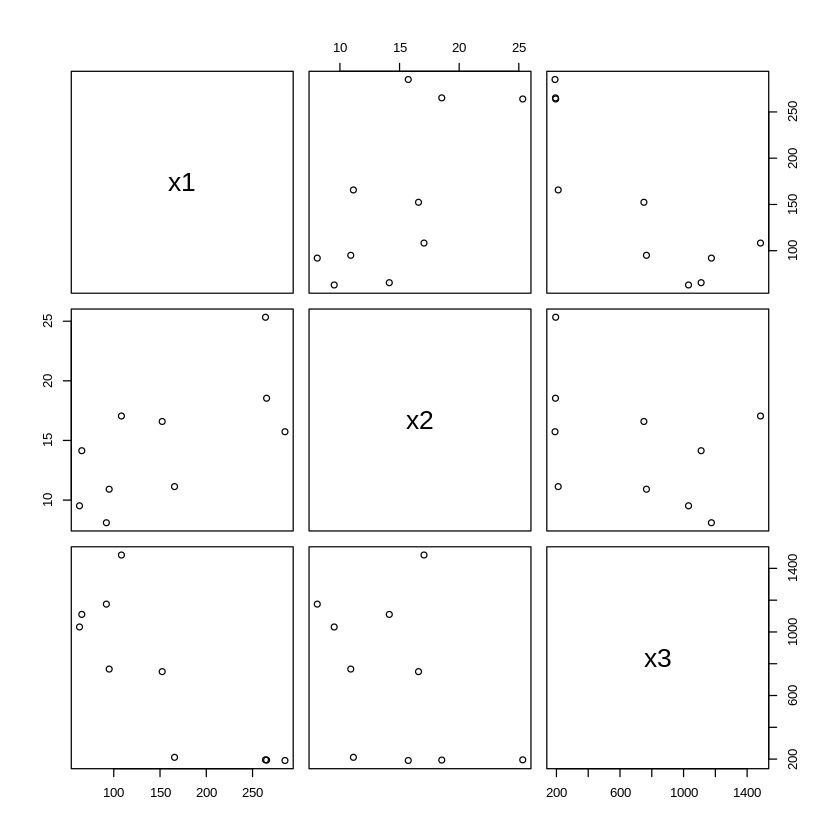

In [4]:
plot(dt)

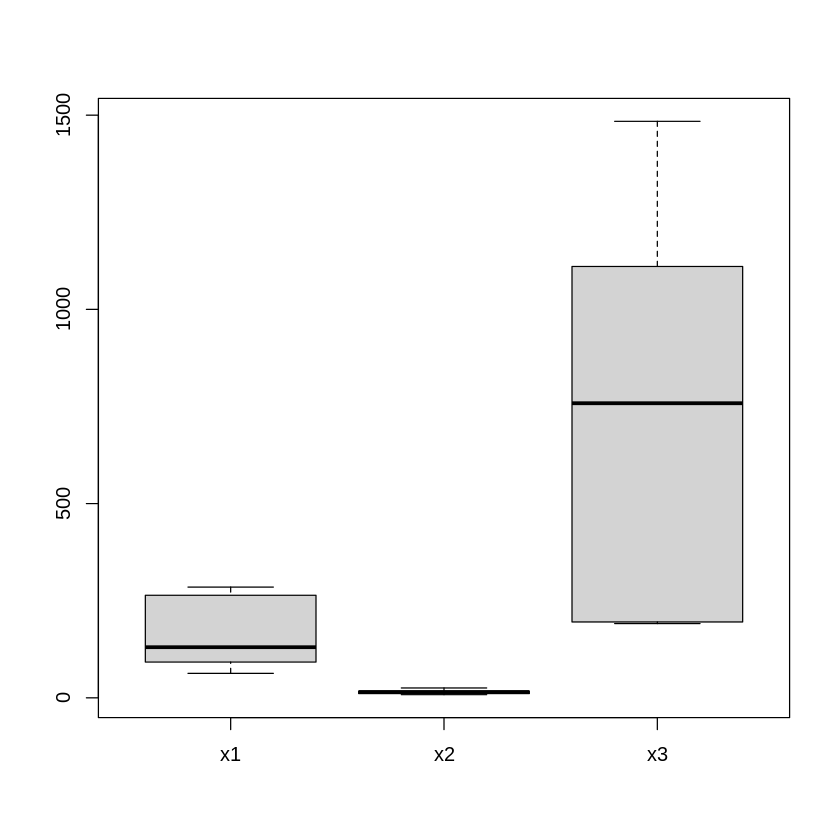

In [5]:
boxplot(dt)

In [6]:
sum(is.na(df))

Warning message in is.na(df):
“is.na() applied to non-(list or vector) of type 'closure'”


[1] 0

**Example-4.12**

In [7]:
X1=dt[,1]

In [8]:
X2=dt[,2]

In [9]:
X=cbind(X1,X2)
X

X1,X2
108.28,17.05
152.36,16.59
95.04,10.91
65.45,14.14
62.97,9.52
263.99,25.33
265.19,18.54
285.06,15.73
92.01,8.10
165.68,11.13


In [10]:
X_bar=colMeans(X)
X_bar=t(X_bar)
X_bar

X1,X2
155.603,14.704


In [11]:
S=cov(X)
S

,X1,X2
X1,7476.4532,303.61862
X2,303.6186,26.19032


In [12]:
S_inv=solve(S)
S_inv

,X1,X2
X1,0.0002527379,-0.002929935
X2,-0.0029299349,0.072148150


In [13]:
(X[1,]-X_bar) #1x2 dim

X1,X2
-47.323,2.346


In [14]:
n=length(dt$x1)
n

[1] 10

In [15]:
D2=matrix(0,nrow=10,ncol=1) #Here The length of x1 is 10



In [16]:
for (i in 1:n){
  D2[i]=(X[i,]-X_bar)%*%S_inv%*%t(X[i,]-X_bar)
}

In [17]:
D2

1.6136422
0.2951294
0.6190857
1.7791404
1.2936454
4.3665512
1.6335129
3.5332867
1.7077146
1.1582915


In [18]:
chi<-qchisq(0.50,2)
chi

[1] 1.386294

In [19]:
Out1<-ifelse(D2<=chi,0,1)
sum(Out1)/n

[1] 0.6

Here 0.4 of the data falls within the 50% contour.if the observation were normally distributed, we would expect about half,or 5, of them to be within this contour.we can fixed the decision that this data is not normally distributed.

**Q-Q plot (Other way to check bivariate  normal dist)**


In [106]:
rm(list=ls())

In [109]:
y=read.csv("/content/Table-1.4.csv")
x=t(t(y))
x

x1,x2,x3
108.28,17.05,1484.10
152.36,16.59,750.33
95.04,10.91,766.42
65.45,14.14,1110.46
62.97,9.52,1031.29
263.99,25.33,195.26
265.19,18.54,193.83
285.06,15.73,191.11
92.01,8.10,1175.16
165.68,11.13,211.15


In [110]:
xj=sort(x,decreasing = F)
n=length(xj)

In [111]:
j=matrix(seq(1,n),n,1)
qj=qnorm((j-0.5)/n)

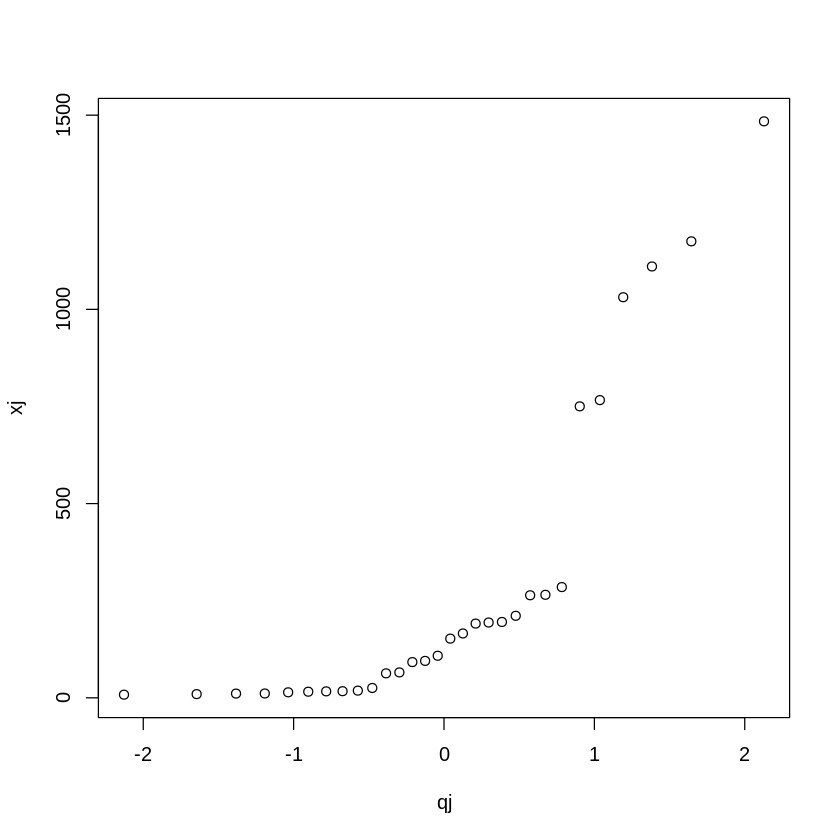

In [112]:
plot(qj,xj)

Above this Q-Q plot, we can take a decision about this data set that this two variable X1 and X2 not follow the bivariate normal distribution.

**Chi_Square plot for Three variable**

In [20]:
rm(list=ls())

In [31]:
z=read.csv("/content/Table-1.4.csv")
z

x1,x2,x3
<dbl>,<dbl>,<dbl>
108.28,17.05,1484.10
152.36,16.59,750.33
95.04,10.91,766.42
65.45,14.14,1110.46
62.97,9.52,1031.29
263.99,25.33,195.26
265.19,18.54,193.83
285.06,15.73,191.11
92.01,8.10,1175.16


In [23]:
X_bar<-colMeans(z)
X_bar

x1      x2      x3 
155.603  14.704 710.911

In [25]:
X_bar<-t(X_bar)
X_bar

x1,155.603
x2,14.704
x3,710.911


In [32]:
S=cov(z)
S
S_inv<-solve(S)
S_inv

,x1,x2,x3
x1,7476.4532,303.61862,-35575.960
x2,303.6186,26.19032,-1053.827
x3,-35575.9596,-1053.82739,237054.270


,x1,x2,x3
x1,0.0008669686,-0.005864256,1.040408e-04
x2,-0.0058642561,0.086166075,-4.970270e-04
x3,0.0001040408,-0.000497027,1.762285e-05


In [29]:
n=length(z[,1])
n

[1] 10

In [35]:
D2<-matrix(0,nrow=10,ncol=1)
for (i in 1:n){
  D2[i]=t(t(z[i,]-X_bar))%*%S_inv%*%t(z[i,]-X_bar)
}
D2

4.8364455
0.3142263
1.2894373
2.0194923
1.4072664
4.9090461
1.6418144
4.3520262
3.0411050
3.1891403


In [38]:
D2_s=sort(D2,decreasing = F)
j=matrix(seq(1,n),n,1)
qj=qchisq((j-0.5)/n,2)


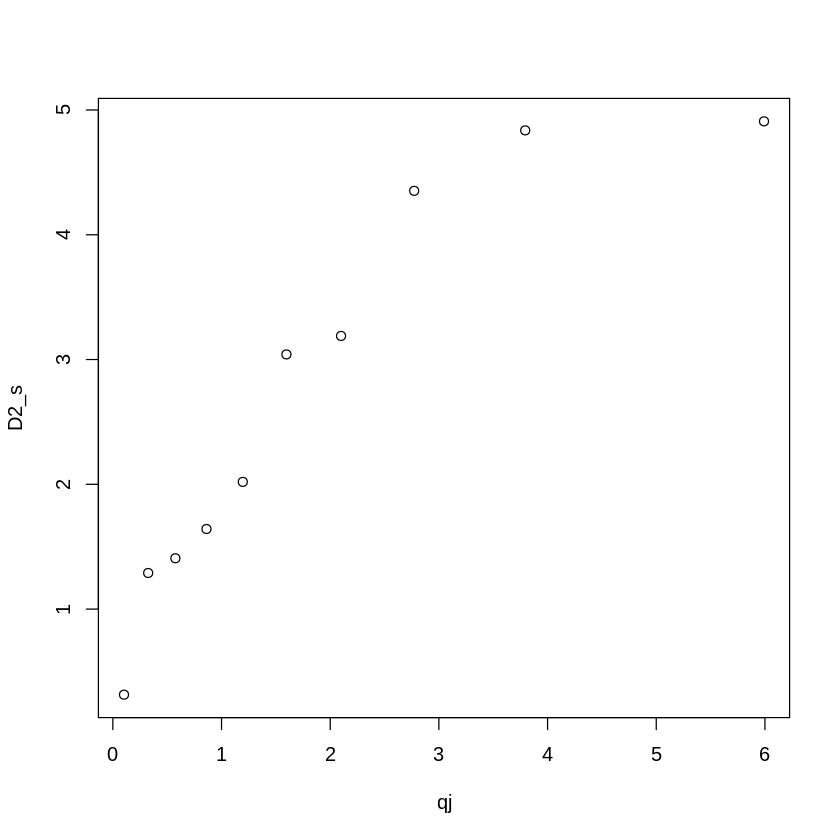

In [39]:
plot(qj,D2_s)

In [ ]:
In this graph show there is not follow the multivariate normal distribution.